In [1]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Import Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL Toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect, func

In [4]:
# Create Engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Inspect the column types
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23')

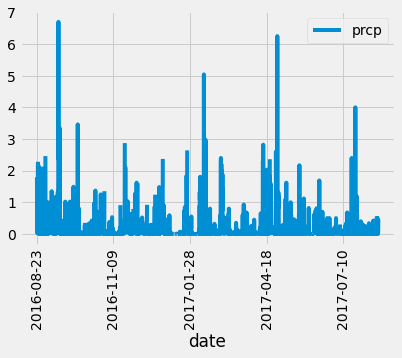

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rows = []
for row in session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).all():  
    rows.append(row)
rows

# Save the query results as a Pandas DataFrame and set the index to the date column
row_df = pd.DataFrame.from_dict(rows)
row_df = row_df.set_index("date")

# Sort the dataframe by date
row_df = row_df.sort_index()
row_df

# Use Pandas Plotting with Matplotlib to plot the data
row_df.plot(rot=90)
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
row_df.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
inspector = inspect(engine)
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Determine the total number of stations
total_stations = session.query(Station.station).count()
total_stations

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [52]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperature = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                group_by(Measurement.station).\
                order_by(func.min(Measurement.tobs).desc()).filter(Measurement.station == 'USC00519281').all()
temperature

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months = session.query(Measurement.station, Measurement.tobs, Measurement.date ).\
               order_by(Measurement.station).filter(Measurement.station == 'USC00519281').all()

twelve_months

[('USC00519281', 70.0, '2010-01-01'),
 ('USC00519281', 62.0, '2010-01-02'),
 ('USC00519281', 74.0, '2010-01-03'),
 ('USC00519281', 75.0, '2010-01-04'),
 ('USC00519281', 74.0, '2010-01-05'),
 ('USC00519281', 76.0, '2010-01-06'),
 ('USC00519281', 69.0, '2010-01-07'),
 ('USC00519281', 66.0, '2010-01-08'),
 ('USC00519281', 70.0, '2010-01-09'),
 ('USC00519281', 75.0, '2010-01-10'),
 ('USC00519281', 64.0, '2010-01-11'),
 ('USC00519281', 60.0, '2010-01-12'),
 ('USC00519281', 61.0, '2010-01-13'),
 ('USC00519281', 68.0, '2010-01-14'),
 ('USC00519281', 64.0, '2010-01-15'),
 ('USC00519281', 66.0, '2010-01-16'),
 ('USC00519281', 67.0, '2010-01-17'),
 ('USC00519281', 70.0, '2010-01-18'),
 ('USC00519281', 67.0, '2010-01-19'),
 ('USC00519281', 67.0, '2010-01-20'),
 ('USC00519281', 69.0, '2010-01-21'),
 ('USC00519281', 60.0, '2010-01-22'),
 ('USC00519281', 75.0, '2010-01-23'),
 ('USC00519281', 75.0, '2010-01-24'),
 ('USC00519281', 65.0, '2010-01-25'),
 ('USC00519281', 75.0, '2010-01-26'),
 ('USC005192

In [48]:
twelve_months_df = pd.DataFrame.from_dict(twelve_months)
twelve_months_df = twelve_months_df.set_index("date")
one_year = twelve_months_df.tail(365)
one_year

station  tobs
date                         
2016-08-10  USC00519281  82.0
2016-08-11  USC00519281  80.0
2016-08-12  USC00519281  76.0
2016-08-13  USC00519281  80.0
2016-08-14  USC00519281  76.0
...                 ...   ...
2017-08-14  USC00519281  77.0
2017-08-15  USC00519281  77.0
2017-08-16  USC00519281  76.0
2017-08-17  USC00519281  76.0
2017-08-18  USC00519281  79.0

[365 rows x 2 columns]

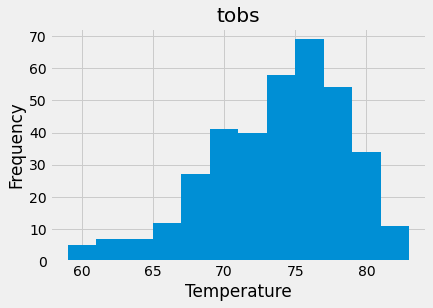

In [56]:
histogram = one_year.hist(bins=12)
histogram
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [57]:
# Close Session
session.close()